In [190]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt

In [191]:
data = load_boston()

In [192]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [193]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [194]:
df['target'] = pd.DataFrame(data=data.target)

In [195]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Linear Regression on individual Attributes without using Sklearn

In [196]:
from scipy import stats

In [197]:
r_values = []
std_errs = []
intercepts = []
slopes = []
for feature in df.columns:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[feature],df['target'])
    r_values.append(r_value**2)
    std_errs.append(std_err)
    intercepts.append(intercept)
    slopes.append(slope)

In [198]:
r_values.pop()

1.0

In [199]:
r_values

[0.15078046904975678,
 0.1299208448942891,
 0.2339900304444748,
 0.030716129708774843,
 0.18260304250169884,
 0.48352545599133434,
 0.1420947440778044,
 0.06246437212178249,
 0.1456385799123248,
 0.21952592104421903,
 0.25784731800922267,
 0.11119611824636269,
 0.5441462975864798]

In [200]:
min_score = min(r_values)
max_score = max(r_values)
min_score,max_score

(0.030716129708774843, 0.5441462975864798)

In [201]:
min_index = r_values.index(min_score)
max_index = r_values.index(max_score)
min_index, max_index

(3, 12)

### We can validate the results by plotting the most correlated and least correlated

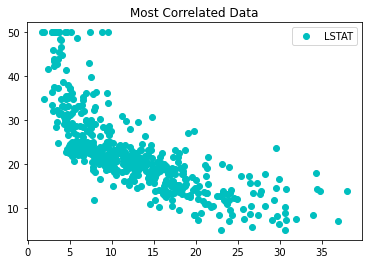

In [202]:
plt.plot(list(df[df.columns[max_index]]),list(df[df.columns[-1]]) , 'o', label=df.columns[max_index], c='c')
plt.legend()
plt.title('Most Correlated Data')
plt.show()

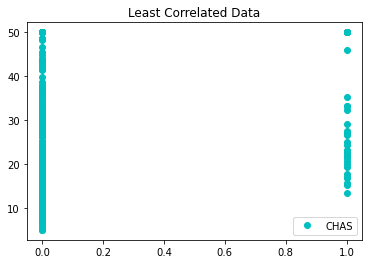

In [203]:
plt.plot(list(df[df.columns[min_index]]),list(df[df.columns[-1]]) , 'o', label=df.columns[min_index], c='c')
plt.legend()
plt.title('Least Correlated Data')
plt.show()

### Finding the errors

In [204]:
#Since it has the least correlation
print('Least correlation error:',std_errs[min_index])
print('Most correlation error:',std_errs[max_index])

Least correlation error: 1.5879535627351193
Most correlation error: 0.03873341621263941


### Predicting the target variable using Sklearn

In [205]:
y = df['target']
accuracy_scores = []
for i in range(len(df.columns)):
    X = df.iloc[:,i:i+1]
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = r2_score(y_test,preds)
    accuracy_scores.append(score)

In [206]:
accuracy_scores

[0.04180934471645348,
 0.0630248516100711,
 0.2931834239044645,
 0.026816022330667044,
 0.17220133263589688,
 0.40726879120470916,
 0.1358061198012902,
 0.040918527672280214,
 0.08217575492150953,
 0.31862041043589795,
 -0.009739868904194982,
 0.09618836200914815,
 0.49399997637030224,
 1.0]

In [207]:
accuracy_scores.pop()

1.0

In [208]:
min_score = min(accuracy_scores)
max_score = max(accuracy_scores)
min_score,max_score

(-0.009739868904194982, 0.49399997637030224)

In [209]:
min_index = accuracy_scores.index(min_score)
max_index = accuracy_scores.index(max_score)
min_index, max_index

(10, 12)

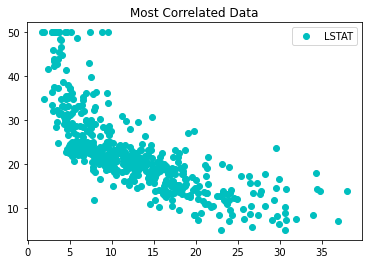

In [210]:
plt.plot(list(df[df.columns[max_index]]),list(df[df.columns[-1]]) , 'o', label=df.columns[max_index], c='c')
plt.legend()
plt.title('Most Correlated Data')
plt.show()

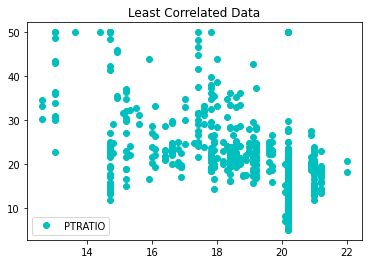

In [211]:
plt.plot(list(df[df.columns[min_index]]),list(df[df.columns[-1]]) , 'o', label=df.columns[min_index], c='c')
plt.legend()
plt.title('Least Correlated Data')
plt.show()

### Applying Linear Regression on All the attributes to develop the prediction model

In [212]:
X = df.drop(['target'],axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [213]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [214]:
preds = model.predict(X_test)

In [215]:
accuracy= r2_score(y_test,preds)

In [216]:
print('The overall accuracy of the model:',round(accuracy*100,2))

The overall accuracy of the model: 75.95


### Conclusion
###  Both the model Predicted as the Lstat attribute to be the best feature for the prediciton of target 